In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Linear Classifiers

In this example, we will construct a simple binary classifier. Let's first look at our dataset.

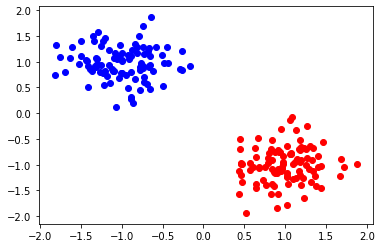

In [2]:
a_samples = np.random.multivariate_normal([-1, 1], [[0.1, 0], [0, 0.1]], 100)
b_samples = np.random.multivariate_normal([1, -1], [[0.1, 0], [0, 0.1]], 100)
a_targets = np.zeros(100)  # Samples from class A are assigned a class value of 0.
b_targets = np.ones(100)  # Samples from class B are assigned a class value of 1.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')

Visually, we can image a line that separates these two sets of data cleanly. Samples appearing on one side of the line are assigned to one class, and vice versa.

(-2, 2)

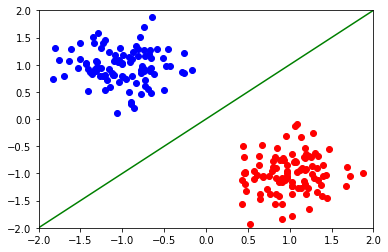

In [3]:
x = np.linspace(-5, 5, 100)
y = x

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='g')
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

What we are looking for is a function $y = f(\mathbf{x})$ that maps the features in $\mathbf{x}$ to a classification (either 0 or 1). The data we generated above is two-dimensional, so our function should consider both features of each sample.

# Weights and Features
The linear classifier we will use takes the form of $y = f(\mathbf{x}; \mathbf{w})$, where $\mathbf{x} = (x_1, x_2)$ is the sample and its features and $\mathbf{w} = (w_1, w_2)$ are the parameters of our classifier. Formally, a linear classifier computes a linear combination of the input and coefficients, $f(\mathbf{x}; \mathbf{w}) = \mathbf{w} \cdot \mathbf{x} = \sum_i w_i x_i.$

**Our perceptron has 3 parameters**

## Initialization
What values should the parameters of our model start with? Typically, weights are randomly initialized using a variety of different techniques. For the purposes of this example, we will sample from a uniform distribution.

In [4]:
# Weight Initialization
weights = np.random.uniform(-1, 1, size=(3,))
print("Weights: {}".format(weights))

Weights: [ 0.61373048 -0.27857633  0.30898444]


# Forward Pass
Calculating the output of a neural network is what is known as a **forward pass**. For our single layer perceptron, this is simply $y = h(\mathbf{w}\cdot\mathbf{x})$.

Let's implement this in Python...

In [5]:
def step(x):
    out = x.copy()
    out[x < 0] = 0
    out[x >= 0] = 1
    return out

def dot(w, x):
    x_bias = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return w @ x_bias.T

# Forward pass -- use input from the blue distribution centered at (-1, 1)
x = np.array([[-1.0, 1.0]])
y = dot(weights, x)
print("Before step function: {}".format(y[0]))

# Step function
out = step(y)
print("Final prediction: {}".format(out[0]))

Before step function: 1.201291249175053
Final prediction: 1.0


# Decision Boundary

Written out fully, the linear combination of the perceptron is:
$y = h(w_0 + w_1 x_1 + w_2 x_2)$

Notice that we have two variables in the input as well as two corresponding parameters of our classifier. We can arrange this in the form a line $Ax + By = C$. 

For our samples $\mathbf{x}$ and $\mathbf{w}$, the equation is $w_1 x_1 + w_2 x_2 - w_0 = 0$. The previous coefficient $C$ has been renamed $w_0$ and will serve as our bias. We will see why this is important in a moment.

In [6]:
def calc_decision_boundary(weights):
    x = -weights[0] / weights[1]
    y = -weights[0] / weights[2]
    m = -y / x
    return np.array([m, y])

Slope: 1.0
Y-Intercept: 0.33333333333333337


(-2, 2)

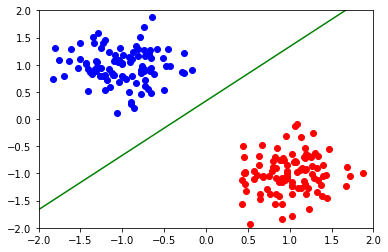

In [17]:
# Classifier Parameters
# print(weights)
weights = np.array([0.1, 0.3, -0.3]) 

# For visualizing the line
m, b = calc_decision_boundary(weights)
print("Slope: {}\nY-Intercept: {}".format(m, b))

# If the slope is undefined, it is vertical.
if weights[2] != 0:
    x = np.linspace(-3, 3, 100)
    y = m * x + b
else:
    x = np.zeros(100)
    y = np.linspace(-3, 3, 100) + b
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='g')
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

Visually we can see that our linear classifier is well suited for this dataset. **How do we show this quantitatively?**

For a binary classifier, if $$\mathbf{w}\cdot\mathbf{x} \geq 0$$ then we assign the sample $x$ to class 1. Otherwise, we will assign it to class 0. Classifiers are typically measured by their error rate. This is calculated by comparing the predictions versus the ground truth targets. Error measures are typically called loss functions. For this example, we will use L1 loss: $L_1 = \sum_{i} |\hat{y}_i - y_i|$, where $\hat{y}_i$ is the ground truth target associated with sample $i$.

In [10]:
def l1_loss(pred, target):
    return np.abs(target - pred)

In [18]:
# Linear combination of weights and input
y_a = dot(weights, a_samples)
y_b = dot(weights, b_samples)

# Step-wise activation function
a_pred = step(y_a)
b_pred = step(y_b)

l1_a = l1_loss(a_pred, a_targets)
l1_b = l1_loss(b_pred, b_targets)
loss_a = l1_a.sum()
loss_b = l1_b.sum()
print("Loss A = {}".format(loss_a))
print("Loss B = {}".format(loss_b))

# Combine and normalize the error between 0 and 1.
loss = np.concatenate((l1_a, l1_b)).mean()
print("Normalized loss = {}".format(loss))

Loss A = 0.0
Loss B = 0.0
Normalized loss = 0.0


# Non-linear Functions

Instead of the step-wise function, let's evaluate the output by using a sigmoid function.

In [19]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [23]:
# Linear combination of weights and input
y_a = dot(weights, a_samples)
y_b = dot(weights, b_samples)

print(y_a)

# Sigmoid function
pred_a = sigmoid(y_a)
pred_b = sigmoid(y_b)

print(pred_a)

# l2_a = 0.5 * ((a_targets - pred_a)**2)
# l2_b = 0.5 * ((b_targets - pred_b)**2)
# loss_a = l2_a.mean()
# loss_b = l2_b.mean()
# print("Loss A = {}".format(loss_a))
# print("Loss B = {}".format(loss_b))

# # Combine and normalize the error between 0 and 1.
# loss = np.concatenate((l2_a, l2_b)).mean()
# print("Normalized loss = {}".format(loss))

[-0.50524345 -0.34725634 -0.53693004 -0.41104303 -0.49228337 -0.75647151
 -0.51093829 -0.47969846 -0.54922097 -0.61609649 -0.47420107 -0.46704472
 -0.72159232 -0.49381827 -0.2633768  -0.25434274 -0.37914271 -0.65455294
 -0.63978042 -0.83598477 -0.58862824 -0.46113878 -0.32218988 -0.27474166
 -0.66695255 -0.34201727 -0.61449182 -0.5318819  -0.48179961 -0.57993157
 -0.22144011 -0.36844513 -0.50370687 -0.42156982 -0.68406151 -0.42286817
 -0.41728838 -0.6683859  -0.63343595 -0.23105048 -0.4318551  -0.33899868
 -0.7667148  -0.22104033 -0.38767478 -0.4092228  -0.50396002 -0.55142025
 -0.57333166 -0.43731505 -0.52534194 -0.50169455 -0.42529961 -0.60128524
 -0.37800064 -0.64182024 -0.75123066 -0.40509889 -0.33011769 -0.76040733
 -0.51681137 -0.53244946 -0.77085835 -0.49789452 -0.5585525  -0.60540325
 -0.4704502  -0.38675095 -0.29984866 -0.42466506 -0.69858035 -0.50606162
 -0.20927372 -0.68777653 -0.47855189 -0.33262532 -0.64790045 -0.39220861
 -0.62699706 -0.43308337 -0.49096466 -0.56129433 -0

What happened to our loss? Our classifier that previously had 0 error is now higher. Recall that we must treat this as a probability. Our classifier now answers this question: **what is the probability that this sample belongs to class B (because B is associated with 1)?**

Note that we could still apply a step-wise function on top of this. If the classifier outputs a value of 0.9 for a given sample, is that sufficient to classify it as class B? What about 0.8, 0.7, 0.6, ...